In [96]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [97]:
df_train = pd.read_csv("C:/DailyDelhiClimateTrain.csv")
df_test= pd.read_csv("C:/DailyDelhiClimateTest.csv")

In [98]:
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [99]:
X_train, y_train = df_train[['humidity', 'wind_speed', 'meanpressure']], df_train[['meantemp']]
X_test, y_test = df_test[['humidity', 'wind_speed', 'meanpressure']], df_test[['meantemp']]


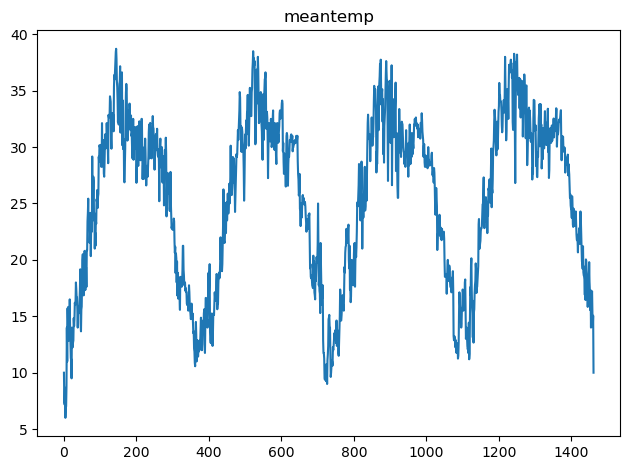

In [100]:
plt.figure()
df_train['meantemp'].plot()
plt.title("meantemp")
plt.tight_layout()
plt.show()

In [101]:
X_train, X_train.shape

(        humidity  wind_speed  meanpressure
 0      84.500000    0.000000   1015.666667
 1      92.000000    2.980000   1017.800000
 2      87.000000    4.633333   1018.666667
 3      71.333333    1.233333   1017.166667
 4      86.833333    3.700000   1016.500000
 ...          ...         ...           ...
 1457   68.043478    3.547826   1015.565217
 1458   87.857143    6.000000   1016.904762
 1459   89.666667    6.266667   1017.904762
 1460   87.000000    7.325000   1016.100000
 1461  100.000000    0.000000   1016.000000
 
 [1462 rows x 3 columns],
 (1462, 3))

In [102]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [103]:
X_train, y_train = create_dataset(X_train, y_train, time_step, step)
X_test, y_test = create_dataset(X_test, y_test, time_step, step)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1452, 10, 3), (104, 10, 3), (1452, 1), (104, 1))

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
model = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(X_train.shape[1:]), return_sequences=True),
    Dropout(0.1),
    SimpleRNN(64, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 10, 128)           16896     
                                                                 
 dropout_14 (Dropout)        (None, 10, 128)           0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 29313 (114.50 KB)
Trainable params: 29313 (114.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(X_train, y_train, epochs=70, batch_size=64, validation_split=0.3, shuffle=False)
y_pred = model.predict(X_test)

Epoch 1/70
16/16 [==============================] - 2s 25ms/step - loss: 6262.1353 - mae: 60.4376 - val_loss: 1241.4890 - val_mae: 13.8848
Epoch 2/70
16/16 [==============================] - 0s 9ms/step - loss: 1393.5820 - mae: 29.3238 - val_loss: 929.2471 - val_mae: 9.0210
Epoch 3/70
16/16 [==============================] - 0s 9ms/step - loss: 785.1912 - mae: 22.4470 - val_loss: 787.5689 - val_mae: 10.9679
Epoch 4/70
16/16 [==============================] - 0s 9ms/step - loss: 551.3513 - mae: 18.4099 - val_loss: 580.5797 - val_mae: 8.4282
Epoch 5/70
16/16 [==============================] - 0s 10ms/step - loss: 428.7347 - mae: 16.3717 - val_loss: 495.3797 - val_mae: 8.5828
Epoch 6/70
16/16 [==============================] - 0s 9ms/step - loss: 356.9058 - mae: 14.9063 - val_loss: 411.3381 - val_mae: 7.7882
Epoch 7/70
16/16 [==============================] - 0s 10ms/step - loss: 309.9827 - mae: 14.0208 - val_loss: 383.1276 - val_mae: 7.9248
Epoch 8/70
16/16 [=============================

Epoch 62/70
16/16 [==============================] - 0s 9ms/step - loss: 61.0068 - mae: 6.4764 - val_loss: 378.4849 - val_mae: 7.5689
Epoch 63/70
16/16 [==============================] - 0s 9ms/step - loss: 60.6477 - mae: 6.5510 - val_loss: 363.0028 - val_mae: 7.4443
Epoch 64/70
16/16 [==============================] - 0s 10ms/step - loss: 60.6217 - mae: 6.4431 - val_loss: 343.6608 - val_mae: 7.2582
Epoch 65/70
16/16 [==============================] - 0s 9ms/step - loss: 60.0949 - mae: 6.5129 - val_loss: 355.1247 - val_mae: 7.4589
Epoch 66/70
16/16 [==============================] - 0s 9ms/step - loss: 60.9300 - mae: 6.5339 - val_loss: 366.5697 - val_mae: 7.6453
Epoch 67/70
16/16 [==============================] - 0s 9ms/step - loss: 57.4911 - mae: 6.3202 - val_loss: 359.2896 - val_mae: 7.4991
Epoch 68/70
16/16 [==============================] - 0s 10ms/step - loss: 56.1725 - mae: 6.2979 - val_loss: 347.1489 - val_mae: 7.0452
Epoch 69/70
16/16 [==============================] - 0s 9ms/

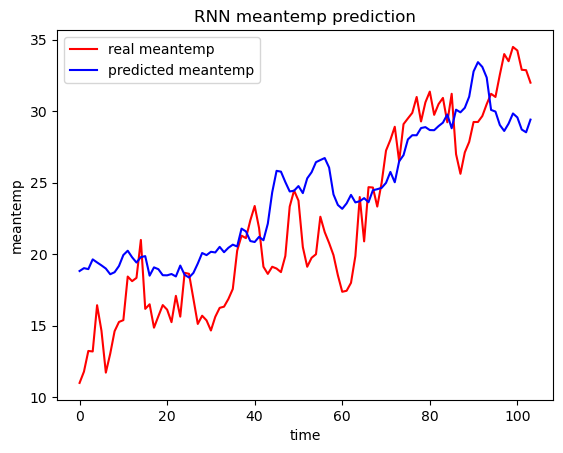

In [107]:

plt.plot(y_test, color='red', label='real meantemp')
plt.plot(y_pred, color='blue', label='predicted meantemp')
plt.title('RNN meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()

In [108]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
model2 = Sequential()
model2.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1:])))
model2.add(Dropout(0.1))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(units=1))
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 128)           67584     
                                                                 
 dropout_16 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 117057 (457.25 KB)
Trainable params: 117057 (457.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])
model2.fit(X_train, y_train, epochs=70, batch_size=64, validation_split=0.3, shuffle=False)
pred_y = model2.predict(X_test)

Epoch 1/70
16/16 [==============================] - 2s 39ms/step - loss: 1822.3406 - mae: 32.1013 - val_loss: 974.7432 - val_mae: 24.9929
Epoch 2/70
16/16 [==============================] - 0s 20ms/step - loss: 682.5186 - mae: 20.1124 - val_loss: 281.4467 - val_mae: 11.9664
Epoch 3/70
16/16 [==============================] - 0s 19ms/step - loss: 325.7763 - mae: 14.0824 - val_loss: 128.6278 - val_mae: 8.8997
Epoch 4/70
16/16 [==============================] - 0s 19ms/step - loss: 164.2357 - mae: 10.2448 - val_loss: 102.2681 - val_mae: 8.2040
Epoch 5/70
16/16 [==============================] - 0s 19ms/step - loss: 138.4931 - mae: 9.3660 - val_loss: 102.2943 - val_mae: 8.0583
Epoch 6/70
16/16 [==============================] - 0s 19ms/step - loss: 121.3545 - mae: 8.9728 - val_loss: 105.4878 - val_mae: 8.0510
Epoch 7/70
16/16 [==============================] - 0s 19ms/step - loss: 109.3433 - mae: 8.4056 - val_loss: 107.9042 - val_mae: 8.1565
Epoch 8/70
16/16 [==============================

16/16 [==============================] - 0s 20ms/step - loss: 62.1874 - mae: 6.4031 - val_loss: 79.4044 - val_mae: 6.9520
Epoch 63/70
16/16 [==============================] - 0s 19ms/step - loss: 70.5351 - mae: 6.9915 - val_loss: 89.4301 - val_mae: 7.2225
Epoch 64/70
16/16 [==============================] - 0s 19ms/step - loss: 69.9297 - mae: 6.9627 - val_loss: 76.8495 - val_mae: 6.7102
Epoch 65/70
16/16 [==============================] - 0s 20ms/step - loss: 67.8337 - mae: 6.7751 - val_loss: 85.0550 - val_mae: 7.0802
Epoch 66/70
16/16 [==============================] - 0s 19ms/step - loss: 61.9311 - mae: 6.4488 - val_loss: 81.0934 - val_mae: 6.9714
Epoch 67/70
16/16 [==============================] - 0s 21ms/step - loss: 60.7603 - mae: 6.5518 - val_loss: 84.8364 - val_mae: 6.9594
Epoch 68/70
16/16 [==============================] - 0s 19ms/step - loss: 62.9656 - mae: 6.6304 - val_loss: 85.1985 - val_mae: 6.9674
Epoch 69/70
16/16 [==============================] - 0s 20ms/step - loss: 

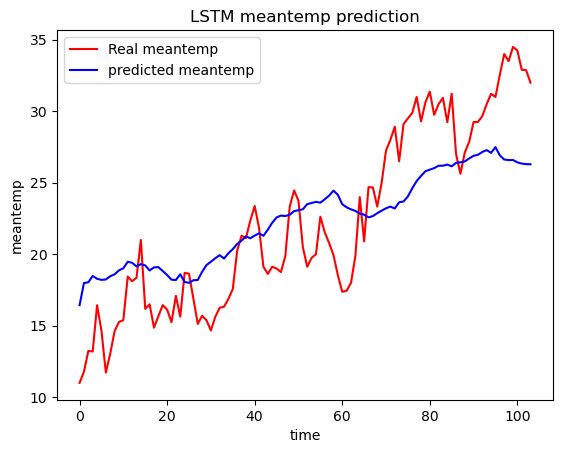

In [110]:
plt.plot(y_test, color='red', label='Real meantemp')
plt.plot(pred_y, color='blue', label='predicted meantemp')
plt.title('LSTM meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()

In [114]:
model3 = Sequential()
model3.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1:])))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(Flatten())
model3.add(Dense(18))
model3.add(Dropout(0.3))
model3.add(Dense(1))
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 8, 128)            1280      
                                                                 
 conv1d_13 (Conv1D)          (None, 6, 64)             24640     
                                                                 
 flatten_6 (Flatten)         (None, 384)               0         
                                                                 
 dense_21 (Dense)            (None, 18)                6930      
                                                                 
 dropout_18 (Dropout)        (None, 18)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 19        
                                                                 
Total params: 32869 (128.39 KB)
Trainable params: 328

In [115]:
model3.compile(loss='mse', optimizer='adam', metrics=['mae'])
model3.fit(X_train, y_train, epochs=70, batch_size=64, validation_split=0.3, shuffle=False)
pred_y = model3.predict(X_test)


Epoch 1/70
16/16 [==============================] - 1s 12ms/step - loss: 5973.5332 - mae: 59.9023 - val_loss: 2233.9639 - val_mae: 39.7051
Epoch 2/70
16/16 [==============================] - 0s 5ms/step - loss: 619.3846 - mae: 19.4139 - val_loss: 1016.8433 - val_mae: 18.8692
Epoch 3/70
16/16 [==============================] - 0s 5ms/step - loss: 272.7138 - mae: 13.6502 - val_loss: 734.6503 - val_mae: 10.6009
Epoch 4/70
16/16 [==============================] - 0s 5ms/step - loss: 158.0686 - mae: 10.4379 - val_loss: 696.3845 - val_mae: 10.3811
Epoch 5/70
16/16 [==============================] - 0s 5ms/step - loss: 135.5801 - mae: 9.4803 - val_loss: 682.8207 - val_mae: 10.4922
Epoch 6/70
16/16 [==============================] - 0s 5ms/step - loss: 121.7436 - mae: 9.0275 - val_loss: 668.9052 - val_mae: 10.3572
Epoch 7/70
16/16 [==============================] - 0s 5ms/step - loss: 109.7831 - mae: 8.6864 - val_loss: 648.7218 - val_mae: 10.0349
Epoch 8/70
16/16 [=============================

16/16 [==============================] - 0s 5ms/step - loss: 68.0943 - mae: 6.8401 - val_loss: 456.0678 - val_mae: 8.4376
Epoch 63/70
16/16 [==============================] - 0s 5ms/step - loss: 68.3614 - mae: 6.8788 - val_loss: 455.7468 - val_mae: 8.4546
Epoch 64/70
16/16 [==============================] - 0s 5ms/step - loss: 70.0048 - mae: 6.9332 - val_loss: 452.5878 - val_mae: 8.5562
Epoch 65/70
16/16 [==============================] - 0s 5ms/step - loss: 72.9724 - mae: 7.0563 - val_loss: 425.1096 - val_mae: 8.6214
Epoch 66/70
16/16 [==============================] - 0s 5ms/step - loss: 67.5199 - mae: 6.7532 - val_loss: 413.9494 - val_mae: 8.5335
Epoch 67/70
16/16 [==============================] - 0s 5ms/step - loss: 72.0948 - mae: 7.0641 - val_loss: 417.0141 - val_mae: 8.8597
Epoch 68/70
16/16 [==============================] - 0s 5ms/step - loss: 75.0526 - mae: 7.2950 - val_loss: 411.1699 - val_mae: 8.6014
Epoch 69/70
16/16 [==============================] - 0s 5ms/step - loss: 7

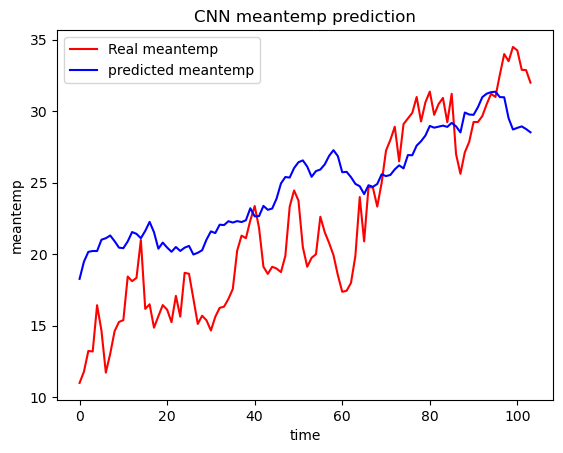

In [116]:

plt.plot(y_test, color='red', label='Real meantemp')
plt.plot(pred_y, color='blue', label='predicted meantemp')
plt.title('CNN meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()